# FIFA Winner prediction

1. First step.

In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [3]:
# load the data
data_matches = pd.read_csv("WorldCupMatches.csv")
data_winner = pd.read_csv("WorldCups.csv")
data_players = pd.read_csv("WorldCupPlayers.csv")

In [4]:
data_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [5]:
data_winner.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
data_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


Text(0.5, 0, 'Country')

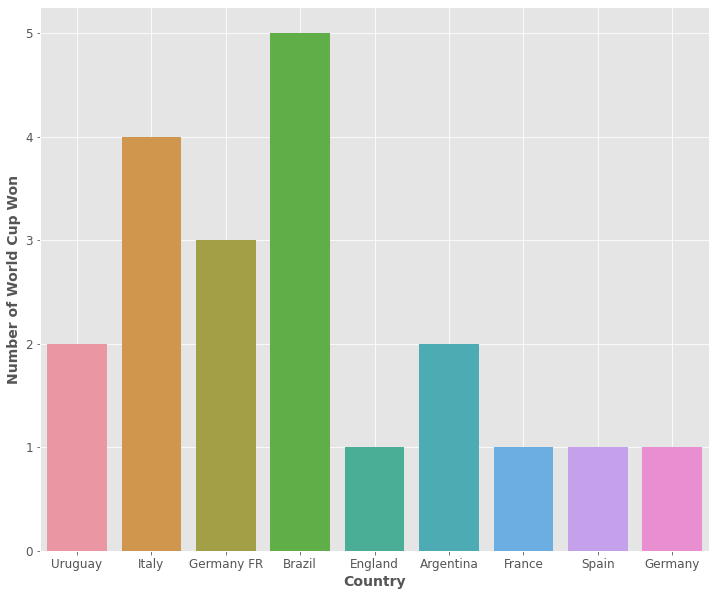

In [7]:
# count plot of world cup winner nations

sns.countplot(x = "Winner", data = data_winner)
plt.grid(True)
plt.ylabel("Number of World Cup Won", fontsize = 14)
plt.xlabel("Country", fontsize = 14)

from the Brazil won 5, Italy won 4 and Argentina won 2

Another cool thing we can explore is related to the fact that, in the matches dataset, we have the stage of the tournament as well. It is interesting to explore it because the number of times that a country passed the group stage is obviously indicative of the quality of that team.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Group 1'),
  Text(1, 0, 'Group 4'),
  Text(2, 0, 'Group 2'),
  Text(3, 0, 'Group 3'),
  Text(4, 0, 'Semi-finals'),
  Text(5, 0, 'Final'),
  Text(6, 0, 'Preliminary round'),
  Text(7, 0, 'Quarter-finals'),
  Text(8, 0, 'Match for third place'),
  Text(9, 0, 'First round'),
  Text(10, 0, 'Group 6'),
  Text(11, 0, 'Group B'),
  Text(12, 0, 'Group A'),
  Text(13, 0, 'Group 5'),
  Text(14, 0, 'Group C'),
  Text(15, 0, 'Group D'),
  Text(16, 0, 'Group F'),
  Text(17, 0, 'Group E'),
  Text(18, 0, 'Round of 16'),
  Text(19, 0, 'Group H'),
  Text(20, 0, 'Group G'),
  Text(21, 0, 'Third place'),
  Text(22, 0, 'Play-off for third place')])

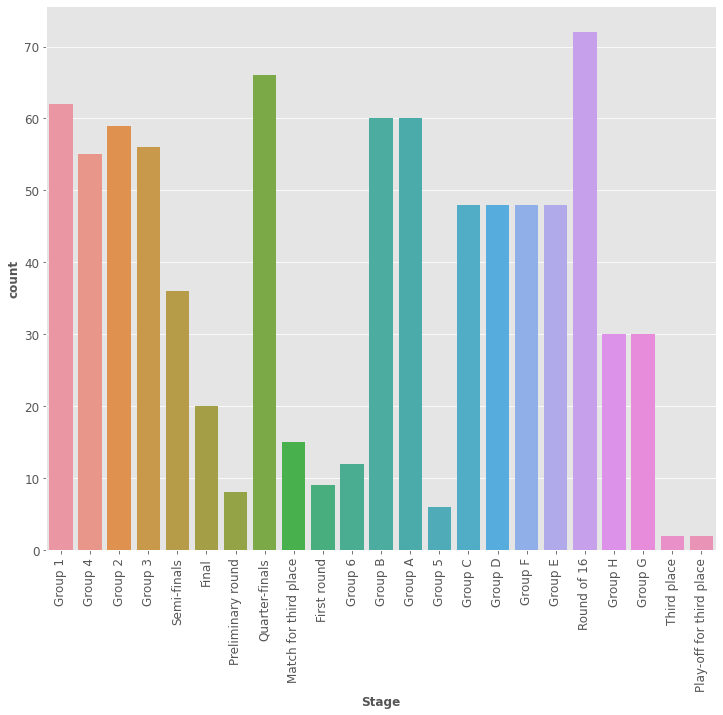

In [8]:
sns.countplot(x = "Stage", data = data_matches)
plt.xticks(rotation = 90)

So we have a lot of group stage matches but only a few elimination stages. That makes complete sense because, of course, you have multiple groups but only one eliminatory phase.

In [9]:
data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [10]:
important_columns = ["Home Team Name","Home Team Goals","Away Team Goals", "Away Team Name","Stage"]
data_matches[important_columns].head()

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Stage
0,France,4.0,1.0,Mexico,Group 1
1,USA,3.0,0.0,Belgium,Group 4
2,Yugoslavia,2.0,1.0,Brazil,Group 2
3,Romania,3.0,1.0,Peru,Group 3
4,Argentina,1.0,0.0,France,Group 1


In [11]:
data_matches = data_matches[important_columns].dropna().reset_index().drop('index', axis = 1)

In [12]:
data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Home Team Name   852 non-null    object 
 1   Home Team Goals  852 non-null    float64
 2   Away Team Goals  852 non-null    float64
 3   Away Team Name   852 non-null    object 
 4   Stage            852 non-null    object 
dtypes: float64(2), object(3)
memory usage: 33.4+ KB


2. Modelling the Probability Distribution

let's say we have two team T1 and T2. what is the probability that Team 1(T1) will win the match?

P(T1 winning against T2) = (number of times T1 won against T2) / (number of matches between T1 and T2)

It is same for T2 and the draw.
But they cannot draw in the elimination stage.

In [13]:
win_draw_lose = []
for i in range(len(data_matches)):
    home_team_goal = int(data_matches["Home Team Goals"].loc[i])
    away_team_goal = int(data_matches["Away Team Goals"].loc[i])
    if home_team_goal == away_team_goal:
        win_draw_lose.append("Draw")
        
    if home_team_goal>away_team_goal:
        win_draw_lose.append(data_matches["Home Team Name"].loc[i])
        
    if home_team_goal<away_team_goal:
        win_draw_lose.append(data_matches["Away Team Name"].loc[i])
        
data_matches["Result"] = win_draw_lose
        

In [14]:
data_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Home Team Name   852 non-null    object 
 1   Home Team Goals  852 non-null    float64
 2   Away Team Goals  852 non-null    float64
 3   Away Team Name   852 non-null    object 
 4   Stage            852 non-null    object 
 5   Result           852 non-null    object 
dtypes: float64(2), object(4)
memory usage: 40.1+ KB


In [15]:
data_matches.head()

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Stage,Result
0,France,4.0,1.0,Mexico,Group 1,France
1,USA,3.0,0.0,Belgium,Group 4,USA
2,Yugoslavia,2.0,1.0,Brazil,Group 2,Yugoslavia
3,Romania,3.0,1.0,Peru,Group 3,Romania
4,Argentina,1.0,0.0,France,Group 1,Argentina


Now we have to select the team for the Qatar world Cup.

In [16]:
qatar_team_list = ["Argentina",
"Australia",
"Belgium",
"Brazil" ,
"Cameroon", 
"Canada" ,
"Costa Rica", 
"Croatia" ,
"Denmark" ,
"Ecuador" ,
"England" ,
"France" ,
"Germany" ,
"Ghana" ,
"IR Iran",
"Japan" ,
"Korea Republic",
"Mexico",
"Morocco", 
"Netherlands",
"Poland",
"Portugal",
"Qatar",
"Saudi Arabia",
"Senegal",
"Serbia",
"Spain",
"Switzerland",
"Tunisia",
"Uruguay",
"USA",
"Wales"]

Now we have to match the data that we have with the team list. We have to make sure that we have all the teams that are going to be in Qatar in the dataset

In [17]:
team_list = list(set(data_matches["Home Team Name"]))
for t in qatar_team_list:
    if t not in team_list:
        print("Houston, we have a problem with team %s "%(t))
        
qatar_probabilities = {'Win': 0.20, 'Draw': 0.20, 'Lose': 0.60}


Houston, we have a problem with team Qatar 


So Qatar is, ironically, the only team we don’t have in our dataset. We'll deal with this later. Let’s add a qatar_probabilities dictionary for now, which is a kind of made-up realistic probability of how many games Qatar can actually win in the World Cup.

Now if we want to do the probability conversion, let’s use the following function:

In [18]:
def select_team_statistics(team):
    data_team = data_matches[(data_matches["Home Team Name"] == team) | (data_matches["Away Team Name"]== team)]
    winning_count = len(data_team[data_team["Result"]== team])
    draw_count = len(data_team[data_team["Result"]=="Draw"])
    lose_count = len(data_team) - winning_count - draw_count
    return data_team, {"Winning Count": winning_count, "Draw Count": draw_count, "Lose Count": lose_count}

In [19]:
select_team_statistics("Qatar")

(Empty DataFrame
 Columns: [Home Team Name, Home Team Goals, Away Team Goals, Away Team Name, Stage, Result]
 Index: [],
 {'Winning Count': 0, 'Draw Count': 0, 'Lose Count': 0})

And let's plot some random result.

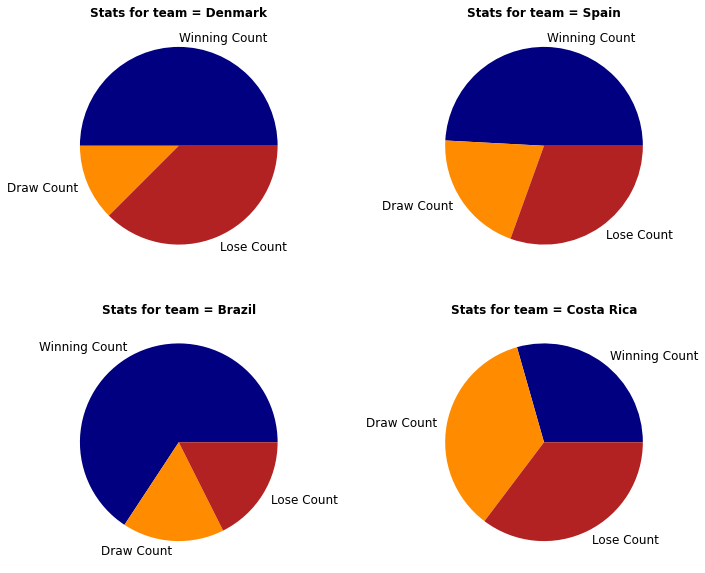

In [20]:
for i in range(1,5):
    plt.subplot(2,2,i)
    random_team = np.random.choice(qatar_team_list)
    plt.title('Stats for team = %s'%(random_team),fontweight='bold')
    team_data,stats = select_team_statistics(random_team)
    labels, values = stats.keys(),stats.values()
    plt.pie(values, labels = labels,colors=['navy','darkorange','firebrick'])

Probabilites for the matches

In [21]:
def select_match_statistics(team_A, team_B):
    data_team = data_matches[(data_matches['Home Team Name']==team_A)& (data_matches['Away Team Name']==team_B)]
    data_team = data_team.append(data_matches[(data_matches['Home Team Name']==team_B)& (data_matches['Away Team Name']==team_A)])
    len_data = len(data_team)
    if len_data==0:
        print('These teams never played against each other')
    else:
        print('These teams played against each other %i times'%(len_data))
    team_A_win = len(data_team[data_team.Result==team_A])
    team_B_win = len(data_team[data_team.Result==team_B])
    draw = len(data_team[data_team.Result=='Draw'])
    return data_team,{team_A:team_A_win,team_B:team_B_win,'Draw':draw}

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
data_match , stats = select_match_statistics("France", "Italy")

These teams played against each other 5 times


In [24]:
data_match,stats = select_match_statistics('France','Belgium')

These teams played against each other 2 times


In [25]:
data_match,stats = select_match_statistics('France','Qatar')

These teams never played against each other


Now. This is a real question. I don’t have the answer because it is hard to automatically predict the outcome of two teams that have never played each other. What we can do is build a score for each time and compare the two scores to convert them into a probability of Team 1 winning, Team 2 winning, or the two teams drawing.

I think that a good score for a team is the number of (normalized) times that the team has passed the group stage. This is, of course, a good point that indicates the quality of a team. We will call it a score of 1. Another important thing to consider is the number of times that a team has actually won the World Cup. We will call it a score of 2. As score_1 is between 0 and 1 and score_2 can be 2, 3, or 4, let’s multiply this by 0.5. So given a team T, we will have:

s(Tx) = s1(Tx) + s2(Tx)/2

so if we have two teams T_x1, T_x2, and we define the probability of T_x1 winning as p(T_x1, T_x2), we can say that:

p(Tx1, Tx2) = s(Tx1)/s(Tx1)+s(Tx2)

and 

p(Tx2, Tx1) = s(Tx2)/s(Tx)+s(Tx2)

But this definition of probability doesn't allow us to draw. So we will rather say that the probability of drawing between two teams that never played a match is fixed, let's say at 0.10. Then we we say that

p(Tx1, Tx2) = (s(Tx1)/s(Tx1)+s(Tx2)) - 0.05

and 

p(Tx2, Tx1) = (s(Tx2)/s(Tx)+s(Tx2)) - 0.05

and the probability of them drawing is :

Pd(Tx1, Tx2) = 0.10

1. Function to get score of a team

In [40]:
def find_score(team):
    team_data, stats = select_team_statistics(team)
    team_stage = team_data['Stage'].reset_index().drop('index',axis=1)
    sum_groups = 0
    sum_finals = 0
    for s in range(len(team_stage)):
        stage_val = team_stage.loc[s].values[0].split(' ')
        if stage_val[0]=='Group':
            sum_groups = sum_groups + 1
        if stage_val[0]!='Group':
            sum_finals = sum_finals + 1
    
    score_1 = sum_finals/(sum_groups+sum_finals)
    try:
        score_2 = 0.5*data_winner.value_counts(subset='Winner')[team]
    except:
        score_2=0
    return score_1+score_2

2. Function to convert the scores of two teams into a probability

In [55]:
def find_score_two_teams(team_A,team_B):
    if team_A == 'Qatar':
        score_1 = 0.09
        score_2 = find_score(team_B)
    if team_B == 'Qatar':
        score_2 = 0.09
        score_1 = find_score(team_A)
    if team_A!='Qatar' and team_B!='Qatar':
        score_1 = find_score(team_A)
        score_2 = find_score(team_B)
    team_A_score = score_1/(score_1+score_2)
    team_B_score = score_2/(score_1+score_2)
    if team_A_score>team_B_score:
        team_A_score = min(0.90,team_A_score)
        team_B_score = max(0.10,team_B_score)
    else:
        team_B_score = min(0.90,team_B_score)
        team_A_score = max(0.10,team_A_score)
    team_A_score = team_A_score-0.05
    team_B_score = team_B_score-0.05
    res = {team_A: team_A_score, team_B:team_B_score, 'Draw':0.10}
    return res

As we can see, the score of Qatar is 0.09. I got that from the first 0.25 quartile of all the score 1 distribution. This is reasonably(low) value for a team that never played in the world cup.

3. Function to extract the probabilities of the result between two teams in a match

In [58]:
def select_match_statistics(team_A, team_B):
    data_team = data_matches[(data_matches['Home Team Name']==team_A)& (data_matches['Away Team Name']==team_B)]
    data_team = data_team.append(data_matches[(data_matches['Home Team Name']==team_B)& (data_matches['Away Team Name']==team_A)])
    len_data = len(data_team)
    if len_data==0:
        #print('These teams never played against each other')
        res = find_score_two_teams(team_A,team_B)
    else:
        #print('These teams played against each other %i times'%(len_data))
        team_A_win = len(data_team[data_team.Result==team_A])/len_data
        team_B_win = len(data_team[data_team.Result==team_B])/len_data
        draw = len(data_team[data_team.Result=='Draw'])/len_data
        res_list = [team_A_win,team_B_win,draw]
        cond = 0
        for i in range(len(res_list)):
            if res_list[i]==1.0:
                res_list[i] = 0.80
                k=i
                cond = 1
                break
        if cond==1:
            for i in range(len(res_list)):
                if i!=k:
                    res_list[i]=0.10

        res = {team_A:res_list[0],team_B:res_list[1],'Draw':res_list[2]}
    return data_team,res

In [59]:
_, stats_1 = select_match_statistics("Saudi Arabia", "Portugal")
stats_1

{'Saudi Arabia': 0.15000000000000002, 'Portugal': 0.75, 'Draw': 0.1}

In [60]:
_, stats_2 = select_match_statistics("France","Portugal")
stats_2

{'France': 0.8, 'Portugal': 0.1, 'Draw': 0.1}

note - I also made sure that it is not possible that a team has a 100% of probability of winning against another by adding some(small) probability in losing and drawing

# 3. The Fun!

Now it is time to make our model run. We have to build the exact groups for the Qatar World Cup. We will make this group run, and a team will win, draw, or lose based on the probability we have built.

Build the algorithmic elimination stage (first team of Group A vs. the second team of Group B, first team of Group B vs. the second team of Group A).

In [61]:
group_A = ['Qatar','Ecuador','Senegal','Netherlands']
group_B = ['England','IR Iran','USA','Wales']
group_C = ['Argentina','Saudi Arabia','Mexico','Poland']
group_D = ['France','Australia','Denmark','Tunisia']
group_E = ['Spain','Costa Rica','Germany','Japan']
group_F = ['Belgium','Canada','Morocco','Croatia']
group_G = ['Brazil','Serbia','Switzerland','Cameroon']
group_H = ['Portugal','Ghana','Uruguay','Korea Republic']

In [62]:
groups = [group_A, group_B, group_C, group_D, group_E, group_F, group_G, group_H]
groups

[['Qatar', 'Ecuador', 'Senegal', 'Netherlands'],
 ['England', 'IR Iran', 'USA', 'Wales'],
 ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'],
 ['France', 'Australia', 'Denmark', 'Tunisia'],
 ['Spain', 'Costa Rica', 'Germany', 'Japan'],
 ['Belgium', 'Canada', 'Morocco', 'Croatia'],
 ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'],
 ['Portugal', 'Ghana', 'Uruguay', 'Korea Republic']]

In [64]:
# this is the probability of group B

group_name = group_B
for team_1 in group_name:
    for team_2 in group_name:
        if team_1 != team_2:
            _, stats = select_match_statistics(team_1, team_2)
            if sum(stats.values()) == 0:
                print(stats)
                print("How do we do that? :(")
            else:
                print(stats)

{'England': 0.85, 'IR Iran': 0.05, 'Draw': 0.1}
{'England': 0.0, 'USA': 0.5, 'Draw': 0.5}
{'England': 0.7480456026058632, 'Wales': 0.15195439739413685, 'Draw': 0.1}
{'IR Iran': 0.05, 'England': 0.85, 'Draw': 0.1}
{'IR Iran': 0.05, 'USA': 0.85, 'Draw': 0.1}
{'IR Iran': 0.05, 'Wales': 0.85, 'Draw': 0.1}
{'USA': 0.5, 'England': 0.0, 'Draw': 0.5}
{'USA': 0.85, 'IR Iran': 0.05, 'Draw': 0.1}
{'USA': 0.4905405405405406, 'Wales': 0.4094594594594595, 'Draw': 0.1}
{'Wales': 0.15195439739413685, 'England': 0.7480456026058632, 'Draw': 0.1}
{'Wales': 0.85, 'IR Iran': 0.05, 'Draw': 0.1}
{'Wales': 0.4094594594594595, 'USA': 0.4905405405405406, 'Draw': 0.1}


Based on these probablities, we run the simulation in the following way: This is for a given group:

In [69]:
def run_group(group_name):
    data_res = pd.DataFrame(np.zeros(len(group_name)).T, index = group_name, columns = ["Points"])
    for team_1 in group_name:
        for team_2 in group_name:
            if team_1 != team_2:
                _, stats = select_match_statistics(team_1, team_2)
                result = np.random.choice(list(stats.keys()),p = list(stats.values()))
                try: 
                    data_res["Points"].loc[result] = data_res["Points"].loc[result] + 3
                except:
                    data_res["Points"].loc[team_1] = data_res["Points"].loc[team_1] + 1
                    data_res["Points"].loc[team_2] = data_res["Points"].loc[team_2] + 1
                    
    return data_res.sort_values(by = "Points", ascending = False)
    

In [73]:
run_group(group_A)

,Points
Netherlands,16.0
Senegal,12.0
Ecuador,5.0
Qatar,1.0


In [80]:
group_names = ['group A','group B','group C','group D','group E','group F','group G','group H']
def run_groups():
    group_list =[]
    for g in range(len(groups)):
        g_group = run_group(groups[g])
        g_group = g_group.rename(columns={'Points':'Points '+group_names[g]})
        group_list.append(g_group)
    return group_list
    

In [100]:
group_list = run_groups()

In [101]:
group_list[0]

,Points group A
Netherlands,16.0
Senegal,13.0
Qatar,3.0
Ecuador,3.0


In [102]:
group_list

[             Points group A
 Netherlands            16.0
 Senegal                13.0
 Qatar                   3.0
 Ecuador                 3.0,
          Points group B
 USA                14.0
 England            12.0
 Wales               6.0
 IR Iran             1.0,
               Points group C
 Argentina               15.0
 Poland                  12.0
 Mexico                   6.0
 Saudi Arabia             3.0,
            Points group D
 France               12.0
 Denmark              12.0
 Australia             9.0
 Tunisia               3.0,
             Points group E
 Spain                 16.0
 Germany                9.0
 Costa Rica             5.0
 Japan                  2.0,
          Points group F
 Belgium            11.0
 Morocco            11.0
 Croatia            11.0
 Canada              0.0,
              Points group G
 Brazil                 14.0
 Switzerland            14.0
 Cameroon                6.0
 Serbia                  0.0,
                 Points grou

From the groups, this is eliminatory stage:

In [105]:
def find_qualification_stage(res_groups):
    qual_matches = []
    group_stage = np.arange(0,len(groups),2)
    k = 0
    for g in range(len(group_stage)):
        qual_matches.append([res_groups[k].index[0],res_groups[k+1].index[1]])
        qual_matches.append([res_groups[k].index[1],res_groups[k+1].index[0]])
        k = k+2
    return qual_matches

In [106]:
find_qualification_stage(group_list)

[['Netherlands', 'England'],
 ['Senegal', 'USA'],
 ['Argentina', 'Denmark'],
 ['Poland', 'France'],
 ['Spain', 'Morocco'],
 ['Germany', 'Belgium'],
 ['Brazil', 'Korea Republic'],
 ['Switzerland', 'Uruguay']]

In [107]:
selections = find_qualification_stage(group_list)

In [123]:
def elimination_stage(selections,k=1):
    quarter_finals_team = []
    for i in range(len(selections)):
        team_1 = selections[i][0]
        team_2 = selections[i][1]
        _,stats = select_match_statistics(team_1,team_2)
        result = np.random.choice(list(stats.keys()),p=list(stats.values()))    
        if result=='Draw':
            result = np.random.choice([team_1,team_2],p=[0.5,0.5])
        quarter_finals_team.append(result)
    if k ==1: 
        quarter_finals_team=np.array(quarter_finals_team).reshape(2,-1)
    return quarter_finals_team

In [124]:
elimination_stage(selections)

array([['England', 'USA', 'Argentina', 'Poland'],
       ['Spain', 'Belgium', 'Brazil', 'Uruguay']], dtype='<U9')

In [133]:
# this is for whole tournament simulation

def whole_tournament():
    group_stage = run_groups()
    first_selection = find_qualification_stage(group_stage)
    quater_finals = elimination_stage(first_selection)
    semi_finals = elimination_stage(quater_finals,k = 0)
    _, stats = select_match_statistics(semi_finals[0],semi_finals[1])
    winner = np.random.choice(list(stats.keys()),p = list(stats.values()))
    if winner == "Draw":
        winner = np.random.choice([semi_finals[0],semi_finals[1]],p = [0.5,0.5])
        
    return winner

Example of whole tournament simulation

In [134]:
group_stage = run_groups()
first_selection = find_qualification_stage(group_stage)
print(first_selection)
quater_finals = elimination_stage(first_selection)
print(quater_finals)
semi_finals = elimination_stage(quater_finals, k = 0)
print(semi_finals)

_, stats = select_match_statistics(semi_finals[0],semi_finals[1])
winner = np.random.choice(list(stats.keys()),p=list(stats.values()))
print(winner)

if winner == "Draw":
    winner = np.random.choice([semi_finals[0],semi_finals[1]],p = [0.5,0.5])
    print(winner)

[['Senegal', 'England'], ['Netherlands', 'USA'], ['Argentina', 'Denmark'], ['Poland', 'France'], ['Spain', 'Belgium'], ['Costa Rica', 'Croatia'], ['Brazil', 'Ghana'], ['Switzerland', 'Korea Republic']]
[['England' 'Netherlands' 'Argentina' 'Poland']
 ['Spain' 'Costa Rica' 'Brazil' 'Switzerland']]
['Netherlands', 'Costa Rica']
Costa Rica


and we run this for 10000 times

In [136]:
# running the simulation for 1000 times as it too expensive to run

stats = []
for i in range(1000):
    if (i%100)==0 and i>0:
        print('Running Simulation number %i' %(i))
        so_far = pd.DataFrame(stats).value_counts().index[0][0]
        print('Most predicted winner so far is %s'%(so_far))
    winner = whole_tournament()
    stats.append(winner)

Running Simulation number 100
Most predicted winner so far is Spain
Running Simulation number 200
Most predicted winner so far is Spain
Running Simulation number 300
Most predicted winner so far is Spain
Running Simulation number 400
Most predicted winner so far is Spain
Running Simulation number 500
Most predicted winner so far is Spain
Running Simulation number 600
Most predicted winner so far is Spain
Running Simulation number 700
Most predicted winner so far is Spain
Running Simulation number 800
Most predicted winner so far is Spain
Running Simulation number 900
Most predicted winner so far is Spain


<AxesSubplot:>

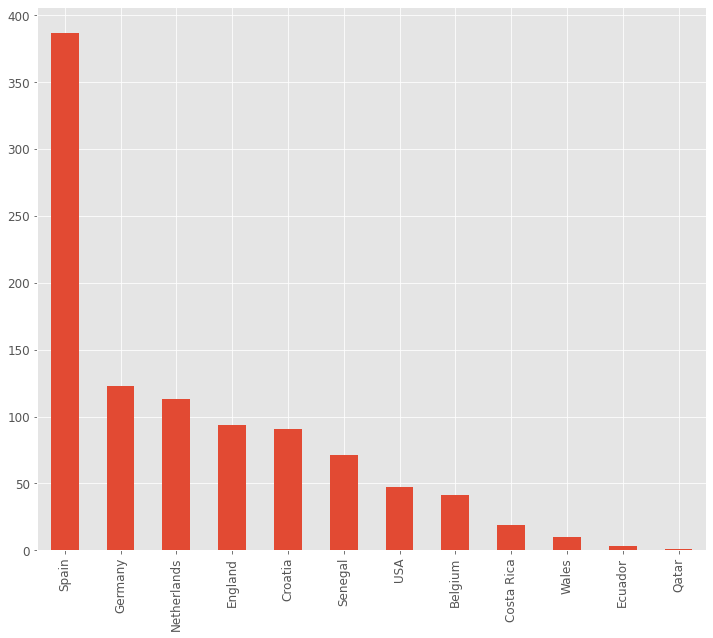

In [137]:
# following are the winner statistics
pd.DataFrame(stats)[0].value_counts().plot(kind="bar") 

Some of them are surprising (Senegal, Costa Rica, Ecuador…, Brazil and Argentina not included), some of them are pretty reliable (Spain, Germany, England)

We can slightly alter the function to determine the winner and runner-up.

In [138]:
def whole_tournament():
    group_stage = run_groups()
    first_selection = find_qualification_stage(group_stage)
    quarter_finals = elimination_stage(first_selection)
    semi_finals = elimination_stage(quarter_finals,k=0)
    _,stats = select_match_statistics(semi_finals[0],semi_finals[1])
    winner = np.random.choice(list(stats.keys()),p=list(stats.values())) 
    if winner=='Draw':
        winner = np.random.choice([semi_finals[0],semi_finals[1]],p=[0.5,0.5])
    second = [s for s in semi_finals if s!=winner]
    return winner,second[0]

In [146]:
stats = []
for i in range(101): # originally 10000
    if (i%10)==0 and i>0: # 100 instead of 10
        print('Running Simulation number %i' %(i))
    winner = whole_tournament()
    stats.append(winner)

Running Simulation number 10
Running Simulation number 20
Running Simulation number 30
Running Simulation number 40
Running Simulation number 50
Running Simulation number 60
Running Simulation number 70
Running Simulation number 80
Running Simulation number 90
Running Simulation number 100


In [147]:
stats = np.array(stats)

In [148]:
stats_old = stats.copy()

<AxesSubplot:title={'center':'Winner Statistics'}>

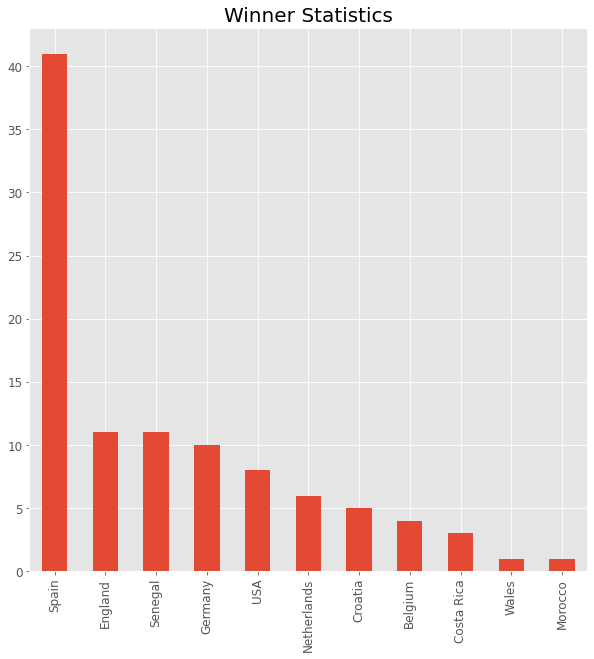

In [149]:
plt.figure(figsize=(10,10))
plt.title('Winner Statistics',fontsize=20)
pd.DataFrame(stats[:,0])[0].value_counts().plot(kind="bar")

<AxesSubplot:title={'center':'Second Team Statistics'}>

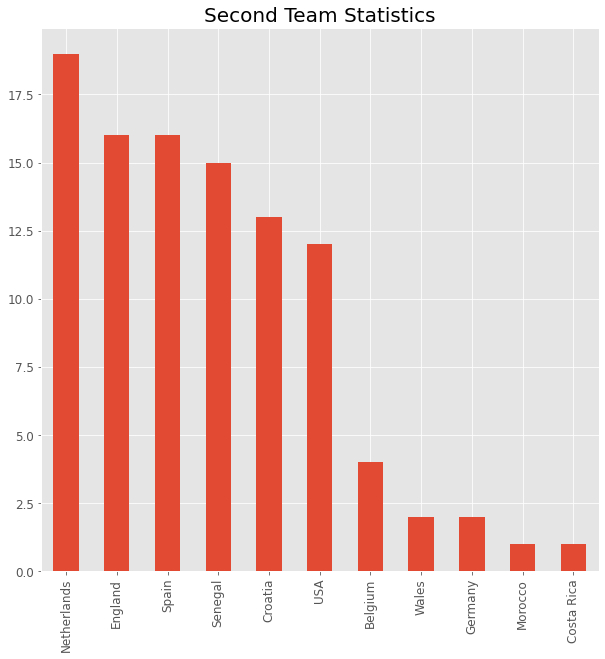

In [150]:
plt.figure(figsize=(10,10))
plt.title('Second Team Statistics',fontsize=20)
pd.DataFrame(stats[:,1])[0].value_counts().plot(kind="bar")

This is actually pretty exciting, and we can conclude a lot of things. The Netherlands, for example, plays a lot in the finals, as does England. Nonetheless, Spain has far more finals victories than either team. We can go on and keep analyzing. Iran, for example, reached the final (at least once), but never won.

# 4.Considerations

In this notebook, we simulated the next World Cup winner. We actually simulated the whole tournament, and we extracted the winner and the second team.

We did that by doing the following:

1. Extracting the statistics of the teams
2. Building a score system for the teams with less to none record of playing against each other
3. Building the algorithm of selections of the groups and eliminatory stage
4. Run the simulation multiple times.
5. Extract the results.

There is a lot of room for improvement. For example, we can consider the actual quality of the teams, considering their players, their coach, and their form.
